In [64]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
import os

# Corrected path - remove the duplicate 09_projects and use correct filename
path = os.path.abspath(os.path.join("..", "01_The Unintended Consequences of Rebalancing", "SPY_TLT_Cleaned.xlsx"))

# Alternative: If you're already in the correct directory, try direct path
# path = "SPY_TLT_Cleaned.xlsx"

# Check if file exists before reading
if not os.path.exists(path):
    print(f"File not found")
    print("Current working directory:", os.getcwd())
    print("Available files in current directory:")
    current_dir = os.path.dirname(path)
    if os.path.exists(current_dir):
        for item in os.listdir(current_dir):
            if item.endswith('.xlsx'):
                print(f"  - {item}")
    else:
        print("Directory doesn't exist")
        # Try alternative paths
        alternative_paths = [
            "SPY_TLT_Cleaned.xlsx",
            os.path.join(".", "SPY_TLT_Cleaned.xlsx"),
            os.path.abspath("SPY_TLT_Cleaned.xlsx")
        ]
        for alt_path in alternative_paths:
            if os.path.exists(alt_path):
                print(f"Found file at alternative path: {alt_path}")
                path = alt_path
                break
else:
    print(f"File found")

# Read the Excel file
if os.path.exists(path):
    df = pd.read_excel(path)
    print("DataFrame loaded successfully!")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
else:
    print("Could not locate the Excel file. Please check the file location.")

File found
DataFrame loaded successfully!
Shape: (281, 4)

First 5 rows:
            Unnamed: 0                      Unnamed: 1  \
0                  NaN                             NaN   
1                 Date  Sum of SPY - TLT First 15 Days   
2  2002-08-01 00:00:00                        0.010151   
3  2002-09-01 00:00:00                       -0.126546   
4  2002-10-01 00:00:00                        0.160759   

                   Unnamed: 2                              Unnamed: 3  
0                         NaN                                     NaN  
1  Sum of SPY-TLT Last 5 Days  Sum of SPY-TLT First 5 Days Next Month  
2                   -0.057039                               -0.019438  
3                   -0.025929                               -0.028645  
4                   -0.044043                                0.009031  


In [66]:
# rename columns to Date	Sum of SPY - TLT First 15 Days	Sum of SPY-TLT Last 5 Days	Sum of SPY-TLT First 5 Days Next Month
df.columns = ['Date', 'Sum of SPY - TLT First 15 Days', 'Sum of SPY - TLT Last 5 Days', 'Sum of SPY - TLT First 5 Days Next Month']

# drop rows 0 to 1 (nan and objects)
df = df.drop(index=[0, 1])

# drop row index 280 (sum values of original data)
df = df.drop(index=[280])

# column Date has dtype object, extract date with slice and convert to datetime
df['Date'] = pd.to_datetime(df['Date'].astype(str).str.slice(0, 10))

# convert other columns to float
df['Sum of SPY - TLT First 15 Days'] = df['Sum of SPY - TLT First 15 Days'].astype(float)
df['Sum of SPY - TLT Last 5 Days'] = df['Sum of SPY - TLT Last 5 Days'].astype(float)
df['Sum of SPY - TLT First 5 Days Next Month'] = df['Sum of SPY - TLT First 5 Days Next Month'].astype(float)


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 2 to 279
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      278 non-null    datetime64[ns]
 1   Sum of SPY - TLT First 15 Days            278 non-null    float64       
 2   Sum of SPY - TLT Last 5 Days              278 non-null    float64       
 3   Sum of SPY - TLT First 5 Days Next Month  278 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 8.8 KB


In [68]:
df.tail()

,Date,Sum of SPY - TLT First 15 Days,Sum of SPY - TLT Last 5 Days,Sum of SPY - TLT First 5 Days Next Month
275,2025-05-01,0.109579,-0.015997,0.023529
276,2025-06-01,0.011664,0.012153,0.025776
277,2025-07-01,0.033737,0.000495,-0.012138
278,2025-08-01,0.007544,0.012641,-0.033569
279,2025-09-01,0.008236,-0.008515,0.003057


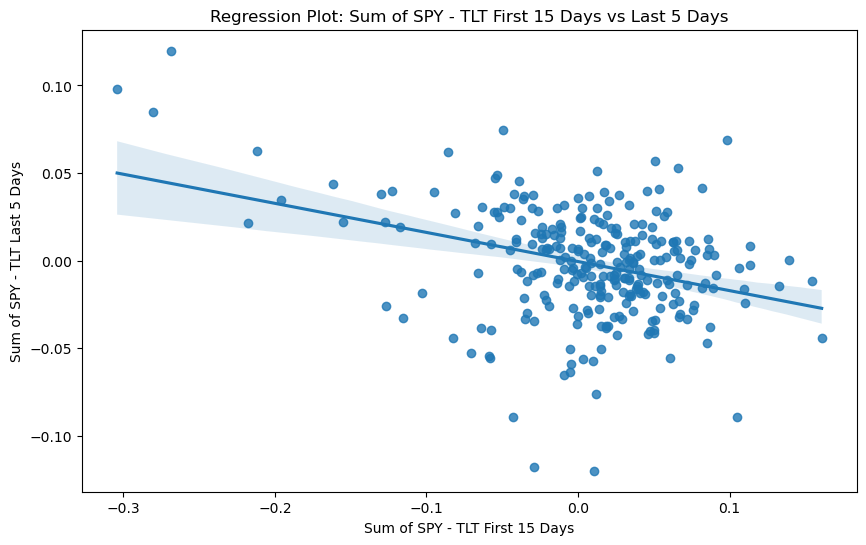

In [69]:
# regplot 1
# x = Sum of SPY - TLT First 15 Days
# y = Sum of SPY - TLT Last 5 Days

"""
For visualization purposes, would be good to multiply the values by 100 to have them in percentage terms.
Since we need only to make a quick regression plot to compare data, we can skip this step.
"""

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Sum of SPY - TLT First 15 Days', y='Sum of SPY - TLT Last 5 Days')
plt.title('Regression Plot: Sum of SPY - TLT First 15 Days vs Last 5 Days')
plt.xlabel('Sum of SPY - TLT First 15 Days')
plt.ylabel('Sum of SPY - TLT Last 5 Days')
plt.show()

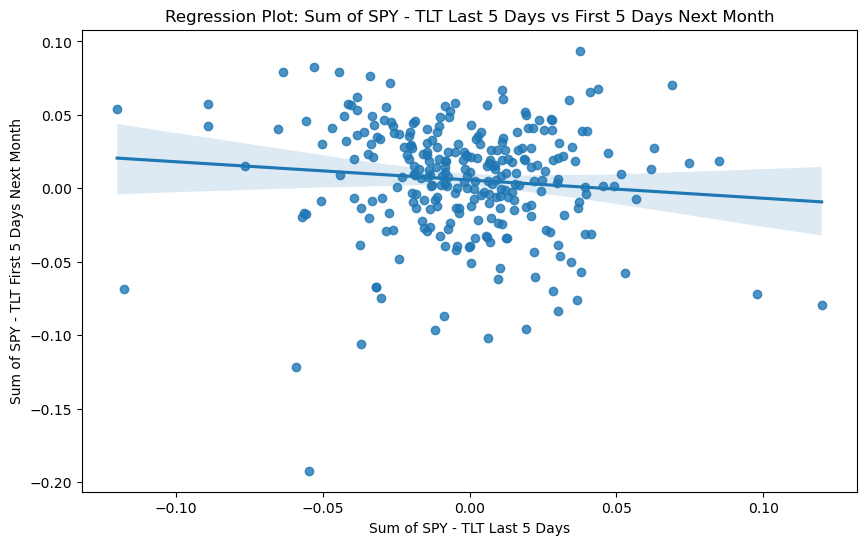

In [70]:
# regplot 2
# x = Sum of SPY - TLT Last 5 Days
# y = Sum of SPY - TLT First 5 Days Next Month

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Sum of SPY - TLT Last 5 Days', y='Sum of SPY - TLT First 5 Days Next Month')
plt.title('Regression Plot: Sum of SPY - TLT Last 5 Days vs First 5 Days Next Month')
plt.xlabel('Sum of SPY - TLT Last 5 Days')
plt.ylabel('Sum of SPY - TLT First 5 Days Next Month')
plt.show()

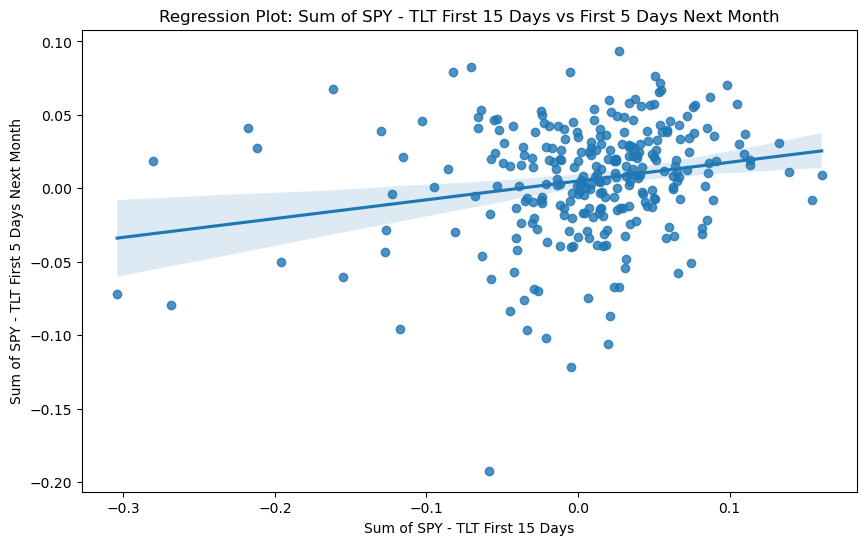

In [71]:
# regplot 3
# x = Sum of SPY - TLT First 15 Days
# y = Sum of SPY - TLT First 5 Days Next Month

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Sum of SPY - TLT First 15 Days', y='Sum of SPY - TLT First 5 Days Next Month')
plt.title('Regression Plot: Sum of SPY - TLT First 15 Days vs First 5 Days Next Month')
plt.xlabel('Sum of SPY - TLT First 15 Days')
plt.ylabel('Sum of SPY - TLT First 5 Days Next Month')
plt.show()